# ABEL scanning example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys
sys.path.append('../')
from abel import *
import numpy as np

initializing ocelot...


### Define the linac and beams

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 10000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]

# define stage
stage = StageQuasistatic2d()
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5

# define first stage (half length)
first_stage = StageQuasistatic2d()
first_stage.driver_source = stage.driver_source
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2
first_stage.plasma_density = stage.plasma_density
first_stage.ramp_beta_mag = stage.ramp_beta_mag

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.1
source.bunch_length = 18e-6 # [m]
source.z_offset = -34e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 5000
source.jitter.t = driver.jitter.t

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 16

### Run simulation scan

In [6]:
# scan the driver timing jitter
linac.scan('scan_example', 
           lambda obj, val: setattr(obj.stage.driver_source.jitter, 't', val) or obj, 
           np.logspace(-15.5, -13.5, 16),
           label='Driver timing jitter (fs rms)',
           scale=1e-5,
           num_shots_per_step=4, 
           parallel=True,
           overwrite=False);

Output()

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads cannot be larger than environment var

initializing ocelot...
>> SHOT 2/64
initializing ocelot...
>> SHOT 7/64
initializing ocelot...
>> SHOT 6/64
initializing ocelot...
>> SHOT 14/64
initializing ocelot...
>> SHOT 8/64
initializing ocelot...
>> SHOT 12/64
initializing ocelot...
>> SHOT 4/64
initializing ocelot...
>> SHOT 1/64
initializing ocelot...
>> SHOT 9/64
initializing ocelot...
>> SHOT 13/64
initializing ocelot...
>> SHOT 15/64
initializing ocelot...
>> SHOT 16/64
initializing ocelot...
>> SHOT 3/64
initializing ocelot...
>> SHOT 10/64
initializing ocelot...
>> SHOT 11/64
initializing ocelot...
>> SHOT 5/64


/pfs/lustrep4/users/lindstrm/.pyvenv/lib/python3.9/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
/pfs/lustrep4/users/lindstrm/.pyvenv/lib/python3.9/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
/pfs/lustrep4/users/lindstrm/.pyvenv/lib/python3.9/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
/pfs/lustrep4/users/lindstrm/.pyvenv/lib/python3.9/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
/pfs/lustrep4/users/lindstrm/.pyvenv/lib/python3.9/site-packages/aptools

Tracking element 1 (s = 0.0 m, -1.60 nC, 5.0 GeV, SourceBasic, stage 0)
Tracking element 2 (s = 2.5 m, -1.60 nC, 21.1 GeV, StageQuasistatic2d, stage 1)
Tracking element 3 (s = 9.4 m, -1.60 nC, 21.1 GeV, InterstageBasic, stage 1)
Tracking element 4 (s = 14.4 m, -1.60 nC, 52.9 GeV, StageQuasistatic2d, stage 2)
Tracking element 5 (s = 25.4 m, -1.60 nC, 52.9 GeV, InterstageBasic, stage 2)
Tracking element 6 (s = 30.4 m, -1.60 nC, 84.6 GeV, StageQuasistatic2d, stage 3)
Tracking element 7 (s = 44.4 m, -1.60 nC, 84.6 GeV, InterstageBasic, stage 3)
Tracking element 8 (s = 49.4 m, -1.60 nC, 116.5 GeV, StageQuasistatic2d, stage 4)
Tracking element 9 (s = 65.7 m, -1.60 nC, 116.5 GeV, InterstageBasic, stage 4)
Tracking element 10 (s = 70.7 m, -1.60 nC, 148.3 GeV, StageQuasistatic2d, stage 5)
Tracking element 11 (s = 89.2 m, -1.60 nC, 148.3 GeV, InterstageBasic, stage 5)
Tracking element 12 (s = 94.2 m, -1.60 nC, 180.2 GeV, StageQuasistatic2d, stage 6)
Tracking element 13 (s = 114.5 m, -1.60 nC, 18

### Plot wakefield

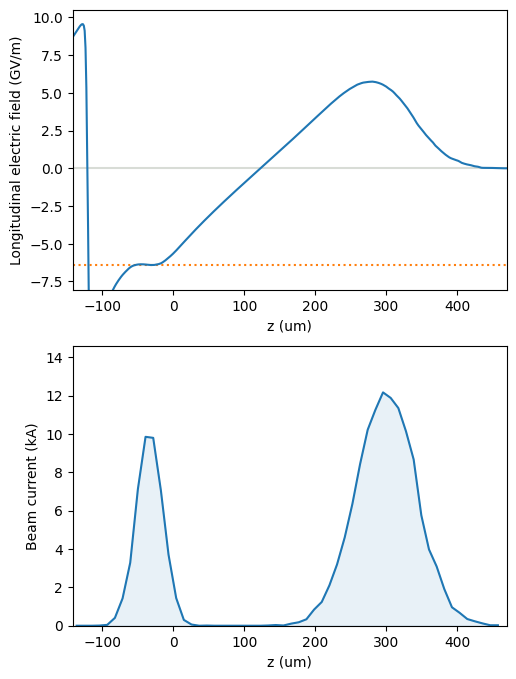

In [7]:
linac.stages[0].plot_wakefield()

### Plot scan

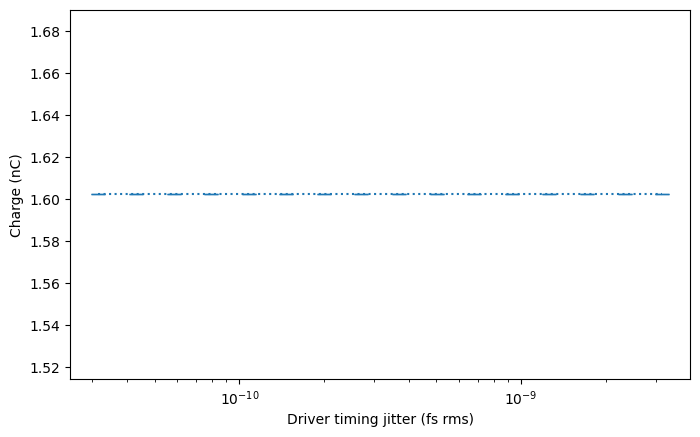

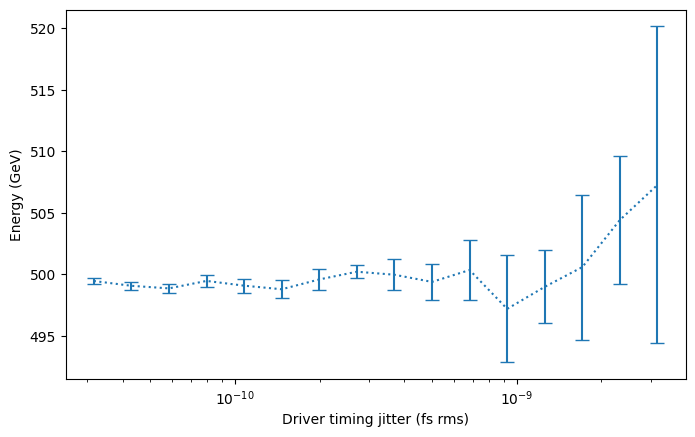

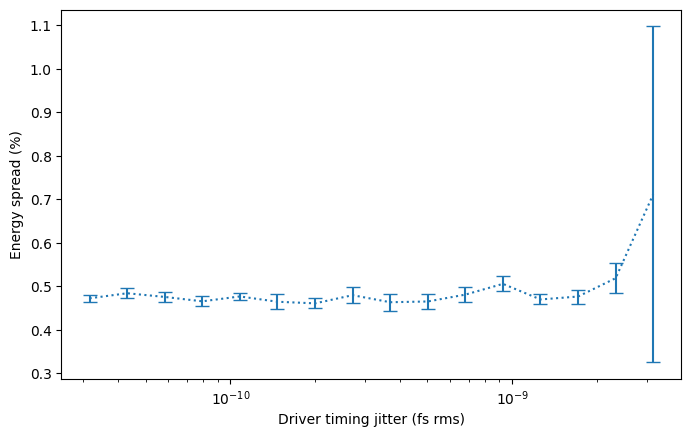

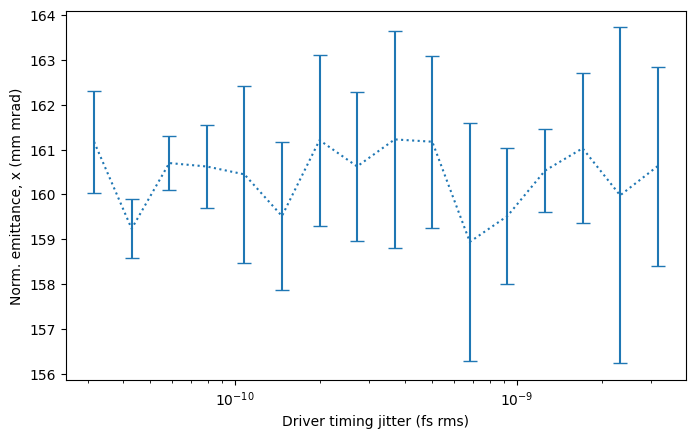

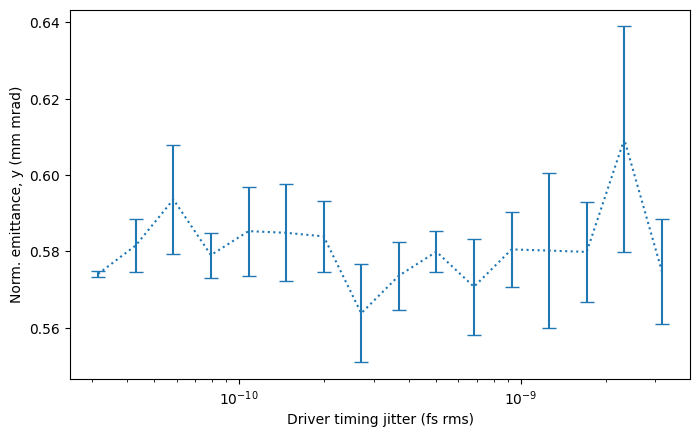

Tracking element 1 (s = 0.0 m, -1.60 nC, 5.0 GeV, SourceBasic, stage 0)
Tracking element 2 (s = 2.5 m, -1.60 nC, 21.3 GeV, StageQuasistatic2d, stage 1)
Tracking element 3 (s = 9.4 m, -1.60 nC, 21.3 GeV, InterstageBasic, stage 1)
Tracking element 4 (s = 14.4 m, -1.60 nC, 53.8 GeV, StageQuasistatic2d, stage 2)
Tracking element 5 (s = 25.4 m, -1.60 nC, 53.8 GeV, InterstageBasic, stage 2)
Tracking element 6 (s = 30.4 m, -1.60 nC, 85.3 GeV, StageQuasistatic2d, stage 3)
Tracking element 7 (s = 44.4 m, -1.60 nC, 85.3 GeV, InterstageBasic, stage 3)
Tracking element 8 (s = 49.4 m, -1.60 nC, 116.1 GeV, StageQuasistatic2d, stage 4)
Tracking element 9 (s = 65.7 m, -1.60 nC, 116.1 GeV, InterstageBasic, stage 4)
Tracking element 10 (s = 70.7 m, -1.60 nC, 148.9 GeV, StageQuasistatic2d, stage 5)
Tracking element 11 (s = 89.2 m, -1.60 nC, 148.9 GeV, InterstageBasic, stage 5)
Tracking element 12 (s = 94.2 m, -1.60 nC, 180.6 GeV, StageQuasistatic2d, stage 6)
Tracking element 13 (s = 114.5 m, -1.60 nC, 18

In [10]:
# plot energy spread vs bunch length
linac.plot_beam_function(Beam.charge, label='Charge (nC)', scale=-1e-9, xscale='log', yscale='linear')
linac.plot_beam_function(Beam.energy, label='Energy (GeV)', scale=1e9, xscale='log', yscale='linear')
linac.plot_beam_function(Beam.rel_energy_spread, label='Energy spread (%)', scale=1e-2, xscale='log')
linac.plot_beam_function(Beam.norm_emittance_x, label='Norm. emittance, x (mm mrad)', scale=1e-6, xscale='log')
linac.plot_beam_function(Beam.norm_emittance_y, label='Norm. emittance, y (mm mrad)', scale=1e-6, xscale='log')